In [44]:
import numpy as np 
import pandas as pd 

/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv


In [81]:
train=pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
test=pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_test.csv')

In [82]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [83]:
train.shape

(19158, 14)

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [85]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [86]:
(train.isnull().sum()*100)/len(train)

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

In [87]:
train.duplicated().any()

False

In [88]:
train.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

**Exploratory Data Analysis**

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

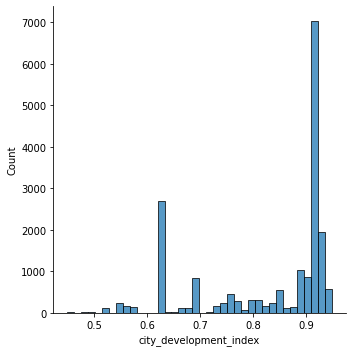

In [90]:
sns.displot(train['city_development_index']);

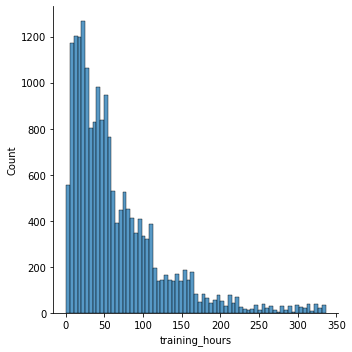

In [91]:
sns.displot(train['training_hours']);

Numerical variable have non-gaussian distribution. We could transform features to be gaussian like using power transform.

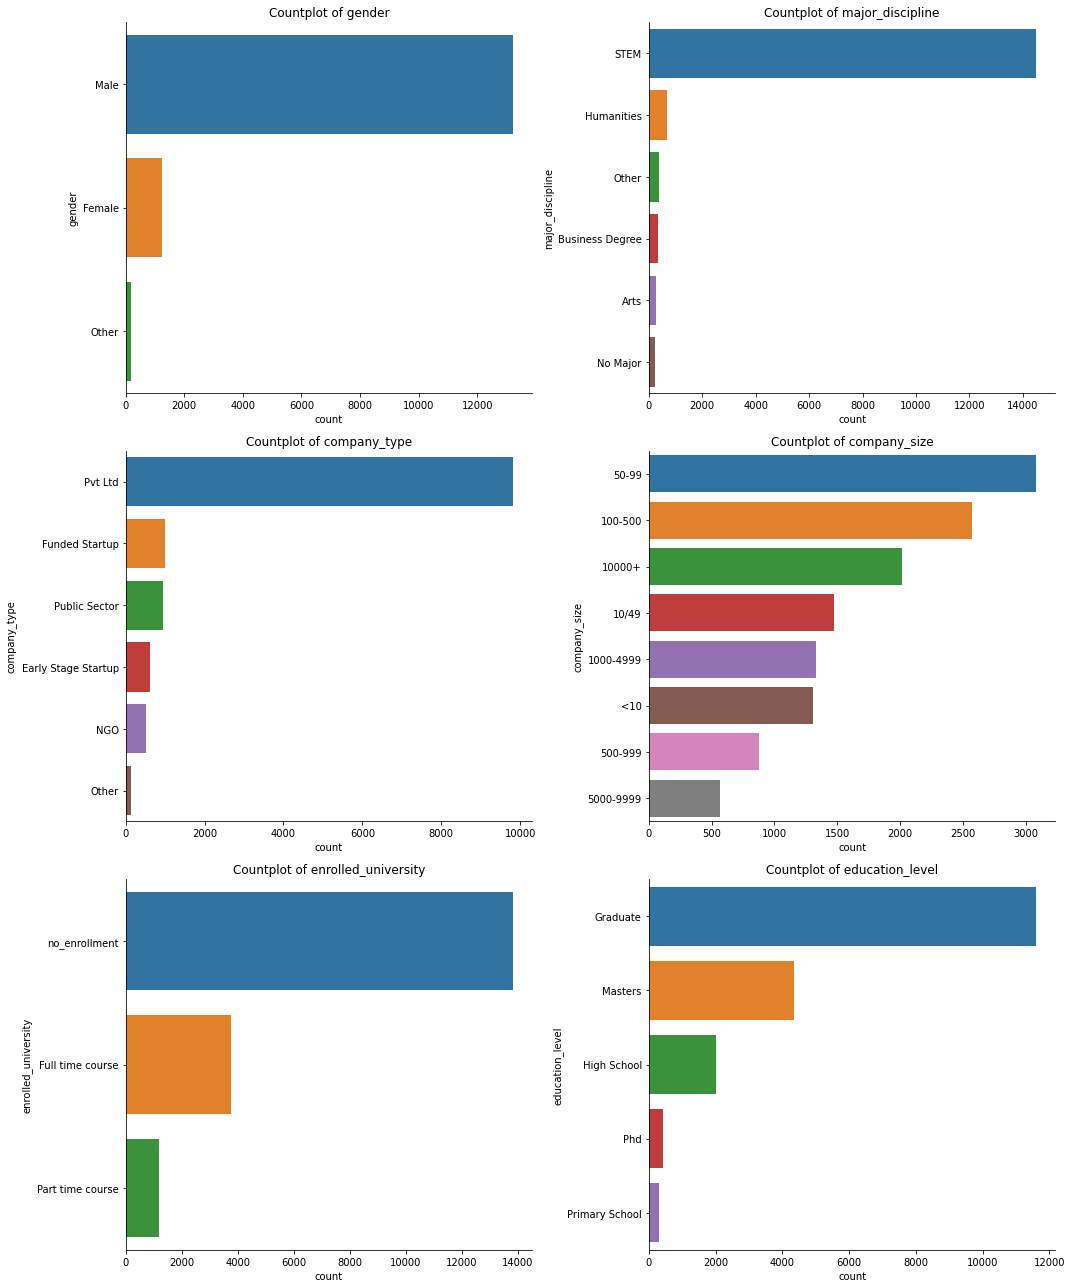

In [92]:
plt.figure(figsize=[15,18])

features=['gender','major_discipline','company_type','company_size','enrolled_university','education_level']
n=1

for f in features:
    plt.subplot(3,2,n)
    order=train[f].value_counts().index
    sns.countplot(y=train[f],order=order);
    sns.despine()
    plt.title("Countplot of {}".format(f))
    n=n+1
plt.tight_layout()

Majorly categorical features have one value in excess compared to other values therefore imputation by most frequent would be suitable for null values.

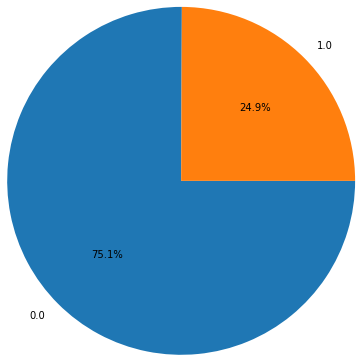

In [93]:
data=train['target'].value_counts()
plt.pie(data,labels=data.index,autopct='%0.1f%%',radius=2,counterclock=False);

We have imbalanced data having class ratio 1:3.

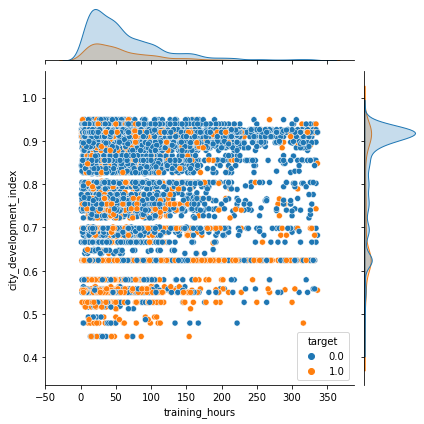

In [94]:
sns.jointplot(x='training_hours',y='city_development_index',data=train,hue='target');

People hailing from cities having low city development index tend to switch more than people from cities having high development index.

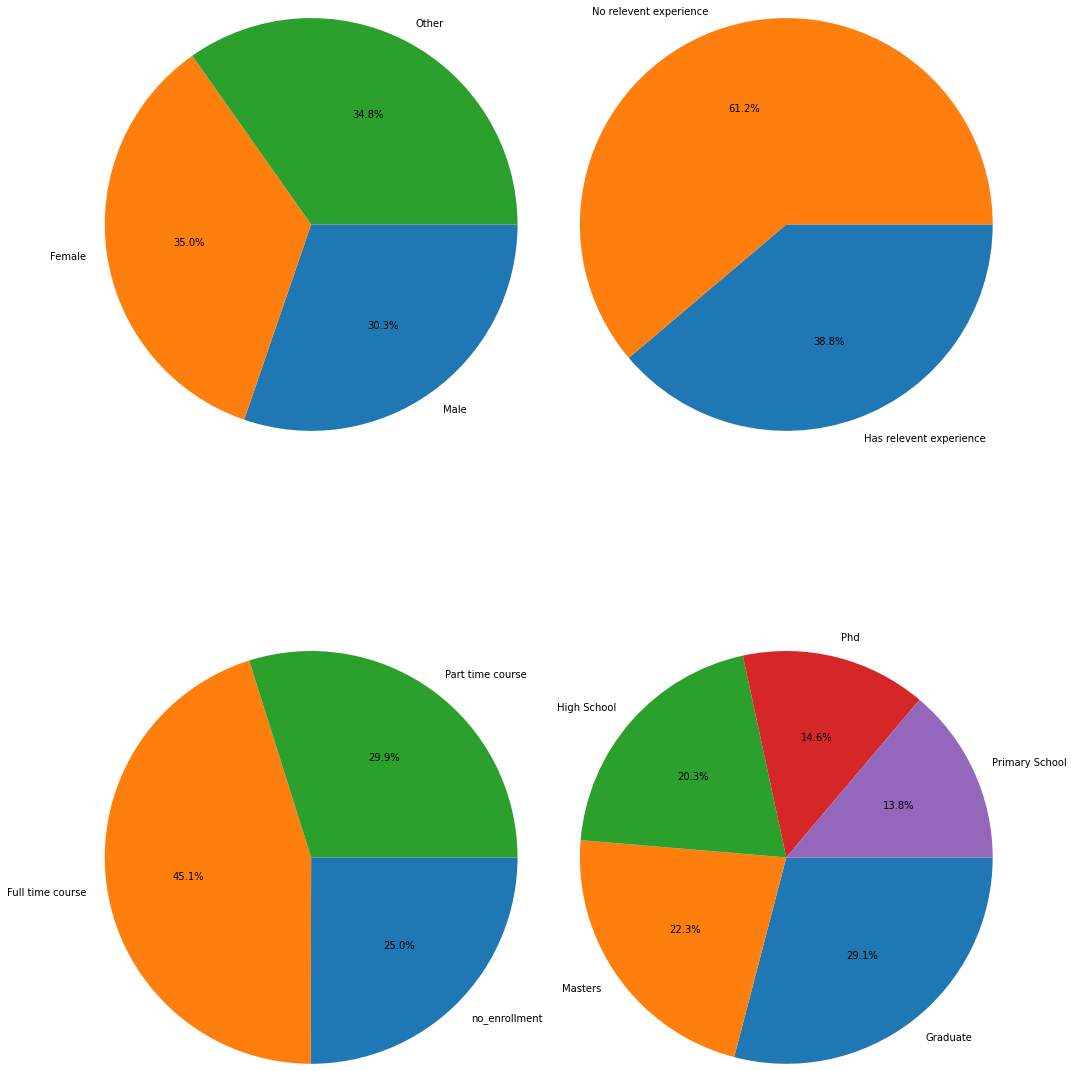

In [95]:
plt.figure(figsize=[15,18])

features=['gender','relevent_experience','enrolled_university','education_level']
n=1

for f in features:
    plt.subplot(2,2,n)
    
    data=100*train[train['target']==1][f].value_counts()/train[f].value_counts()
    plt.pie(data,labels=data.index,autopct='%0.1f%%',radius=1.3,counterclock=False);
    n=n+1
plt.tight_layout()

**Data Preprocessing**

In [96]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [97]:
train.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

Dropping enrollee_id because it contain no useful information,city because city development index categories cities.

In [98]:
X=train.drop(columns=['enrollee_id','city','target'],axis=1)
y=train['target']

In [99]:
#numerical columns
num=X.select_dtypes(exclude='object').columns

#categorical columns
cat=X.select_dtypes(include='object').columns

In [100]:
impute=SimpleImputer(strategy='most_frequent')

Xc=impute.fit_transform(X[cat])

In [101]:
encoding=OneHotEncoder()

Xc=encoding.fit_transform(Xc)

In [102]:
transform=PowerTransformer()

Xn=transform.fit_transform(X[num])

**Feature Selection**

We will performed feature selection on categorical featues

In [103]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

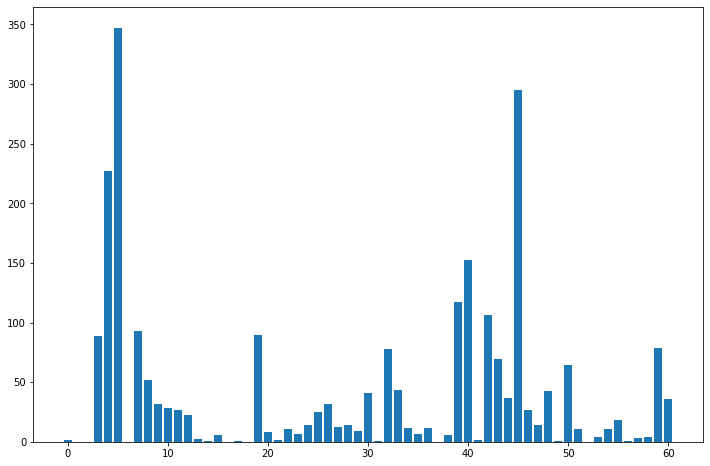

In [104]:
fs=SelectKBest(score_func=chi2,k='all')
fs.fit(Xc,y)
#chi square method is used to test for independence of categorical variables

plt.figure(figsize=(12,8))
plt.bar([i for i in range(len(fs.scores_))],fs.scores_);

Not all features have equal importance, therefore we will drop non-informative features.

**Model Evaluation Metric**

In [105]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [106]:
def evaluate(X,y,model):
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    
    return scores

Test to determine k parameter for feature selection

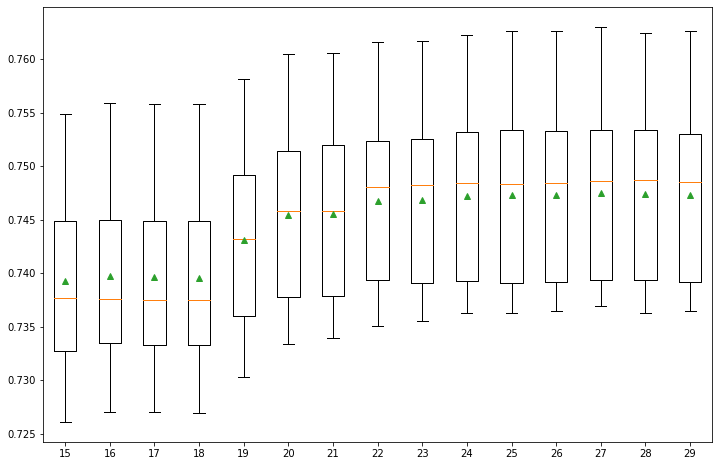

In [107]:
results=[]
Xc=Xc.toarray()

for i in range(15,30):
    fs=SelectKBest(score_func=chi2,k=i)
    fs.fit(Xc,y)
    
    Xfs=fs.transform(Xc)
    X=np.concatenate([Xn,Xfs],axis=1)
    
    results.append(evaluate(X,y,LogisticRegression()))
    
plt.figure(figsize=(12,8))
plt.boxplot(results,labels=range(15,30),showmeans=True);

The roc score increases as the number of featues increases from 15 but becomes stagnant after 23, therefore we will set k=23

In [108]:
fs=SelectKBest(score_func=chi2,k=23)
fs.fit(Xc,y)

Xfs=fs.transform(Xc)
X=np.concatenate([Xn,Xfs],axis=1)

X.shape

(19158, 25)

**Spot Checking Algorithms**

In [109]:
def get_models():
    
    models=[]
    names=[]
    
    models.append(LogisticRegression())
    names.append('lr') 
                  
    models.append(RandomForestClassifier())
    names.append('rf')              
                  
    models.append(KNeighborsClassifier())
    names.append('knn')
    
    models.append(GaussianNB())
    names.append('nb')
    
    models.append(AdaBoostClassifier())
    names.append('adb')
    
    models.append(GradientBoostingClassifier())
    names.append('grb')

    return models,names

In [110]:
results=[]
model,names=get_models()

for i in range(len(model)):
    results.append(evaluate(X,y,model[i]))
    
for i in range(len(results)):
    print(f'{names[i]}: {results[i].mean()}, {(results[i].std())}')

lr: 0.7468564859854856, 0.008475946041532383
rf: 0.7313933549410027, 0.005362145740699756
knn: 0.7026297048365577, 0.005436525377487007
nb: 0.6842526805026311, 0.0045710174157115886
adb: 0.7819725312026293, 0.007954679538855047
grb: 0.7844831390402774, 0.008059219311511066


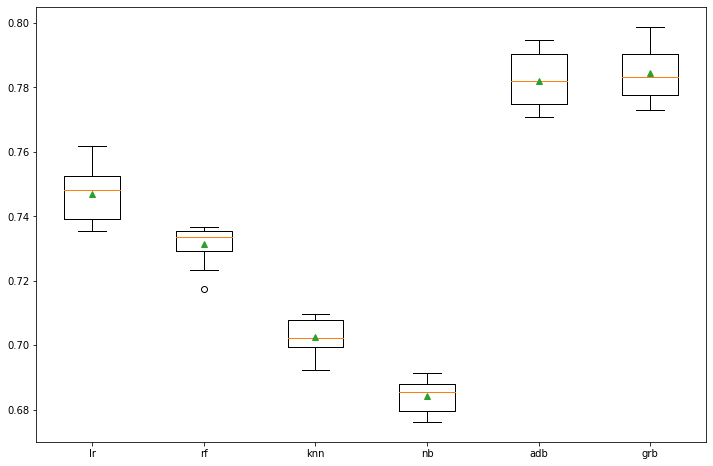

In [111]:
plt.figure(figsize=(12,8))
plt.boxplot(results,labels=names,showmeans=True);

**Adaboost and Gradientboosting performed best**

**Correcting Class Imbalance**

In [133]:
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline

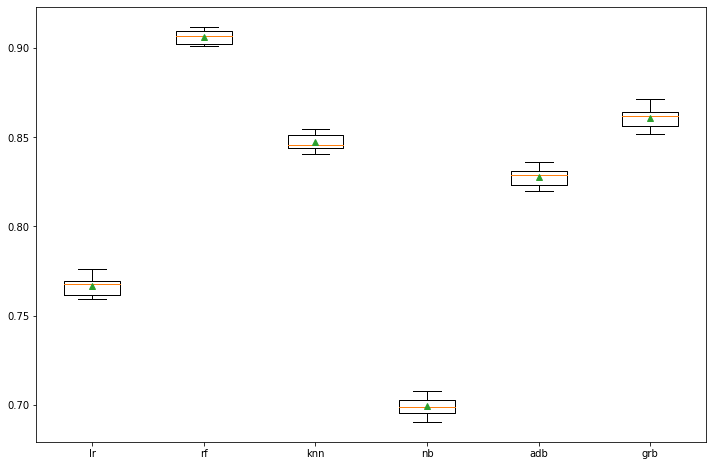

In [113]:
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_res,y_res=resample.fit_resample(X,y)

results=[]
model,names=get_models()

for i in range(len(model)):
    results.append(evaluate(X_res,y_res,model[i]))
    
plt.figure(figsize=(12,8))
plt.boxplot(results,labels=names,showmeans=True);

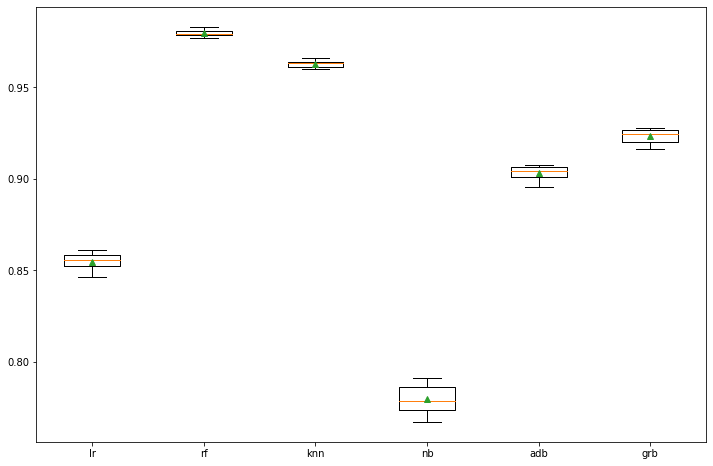

In [116]:
results=[]

resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
X_res,y_res=resample.fit_resample(X,y)

for i in range(len(model)):
    results.append(evaluate(X_res,y_res,model[i]))
    
plt.figure(figsize=(12,8))
plt.boxplot(results,labels=names,showmeans=True);

We have used two types of sampling techniques, they have significantly increased the roc auc score. Out of the two Smote in combination with edited nearest neighbor have performed better than Smote in combination with tomeklinks

In [ ]:
resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
X_res,y_res=resample.fit_resample(X,y)

**Hyperparameter Optimization**

In [117]:
from sklearn.model_selection import GridSearchCV

In [120]:
parameters={'n_estimators':range(150,300,20),
            'max_features':[0.4,0.5,0.6,0.7,0.8]}

In [121]:
model=RandomForestClassifier()
cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

grid=GridSearchCV(model,parameters,scoring='roc_auc',cv=cv,n_jobs=-1)
grid.fit(X_res,y_res)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [0.5, 0.6000000000000001,
                                          0.7000000000000001, 0.8, 0.9],
                         'n_estimators': range(50, 200, 20)},
             scoring='roc_auc')

In [122]:
grid.best_score_

0.9751167843471642

In [123]:
params=grid.best_params_

**Final Model Pipeline**

In [139]:
inter=Pipeline([('i',SimpleImputer(strategy='most_frequent')),
                ('e',OneHotEncoder()),
                ('fs',SelectKBest(score_func=chi2,k=23))])
              
transformers=[('t',PowerTransformer(),num),
              ('inter',inter,cat)]
    
steps=[('pre',ColumnTransformer(transformers=transformers)),
       ('sampling',SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))),
       ('model',RandomForestClassifier(**params))]

In [140]:
X_train=train.drop(columns=['enrollee_id','city','target'],axis=1)
y_train=train['target']

X_test=test.drop(columns=['enrollee_id','city'],axis=1)

In [141]:
model=Pipeline(steps=steps)
model.fit(X_train,y_train)

predictions=model.predict(X_test)

In [148]:
submission = pd.DataFrame({'enrollee_id':test['enrollee_id'],'target':predictions})
submission.head(10)

,enrollee_id,target
0,32403,0.0
1,9858,0.0
2,31806,1.0
3,27385,0.0
4,27724,0.0
5,217,1.0
6,21465,1.0
7,27302,1.0
8,12994,0.0
9,16287,1.0


In [149]:
submission.to_csv('submissions.csv',index=False)